# Problem statement :- Build an AI model that can classify SMS messages as spam or legitimate.

In [11]:
###---------------------------
### Import Necessory Libraries
###---------------------------

import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

import warnings
warnings.filterwarnings("ignore")


In [12]:
# Download necessary NLTK data

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
###-----------------
### Load the dataset
###-----------------

file_path = '/content/drive/MyDrive/Spam detection /'

data = pd.read_csv(file_path + 'spam.csv',encoding='latin1')

In [14]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [18]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Renaming columns

data.rename(columns={'v1':'label','v2':'message'},inplace=True)

# Some Visualization..

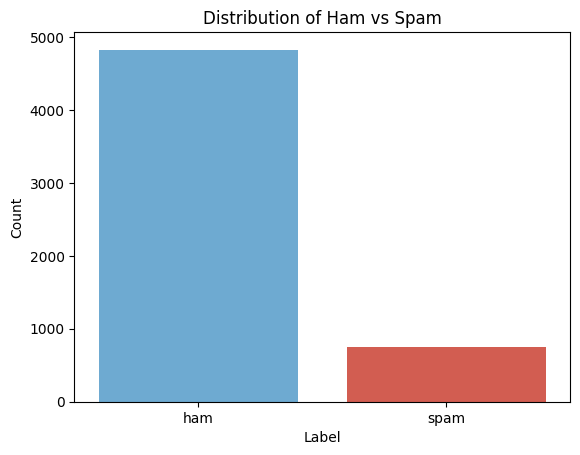

In [20]:
# Countplot to visualize the distribution of 'ham' and 'spam'
sns.countplot(x='label', data=data, palette=['#5DADE2', '#E74C3C'])
plt.title('Distribution of Ham vs Spam')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [21]:
# Histogram of message lengths

data['message_length'] = data['message'].apply(len)



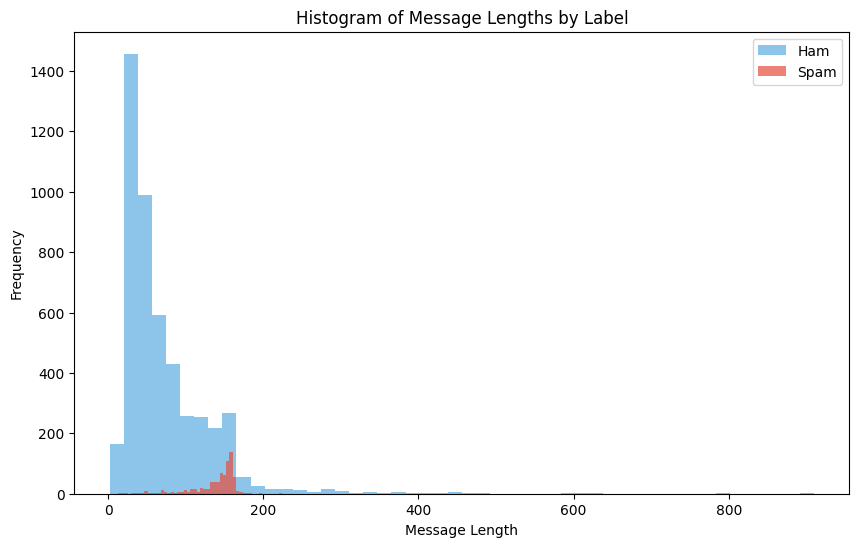

In [22]:
plt.figure(figsize=(10, 6))
data[data['label'] == 'ham']['message_length'].plot(kind='hist', bins=50, color='#5DADE2', alpha=0.7, label='Ham')
data[data['label'] == 'spam']['message_length'].plot(kind='hist', bins=50, color='#E74C3C', alpha=0.7, label='Spam')
plt.title('Histogram of Message Lengths by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

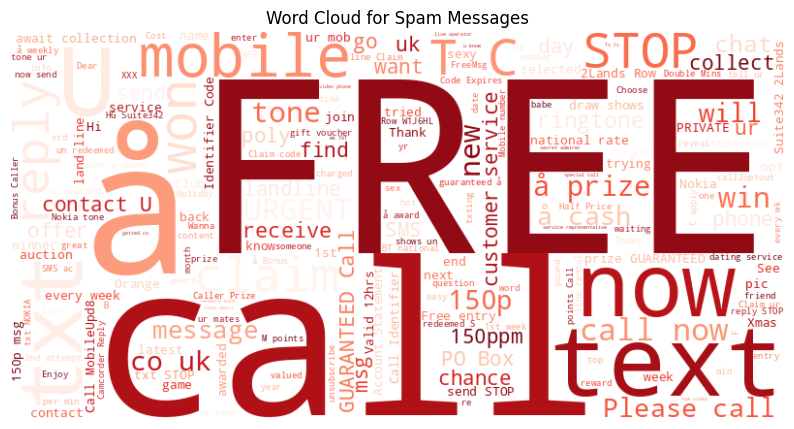

In [23]:
from wordcloud import WordCloud

# Generate word clouds for both labels
spam_words = ' '.join(data[data['label'] == 'spam']['message'])
ham_words = ' '.join(data[data['label'] == 'ham']['message'])

# Word Cloud for Spam
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

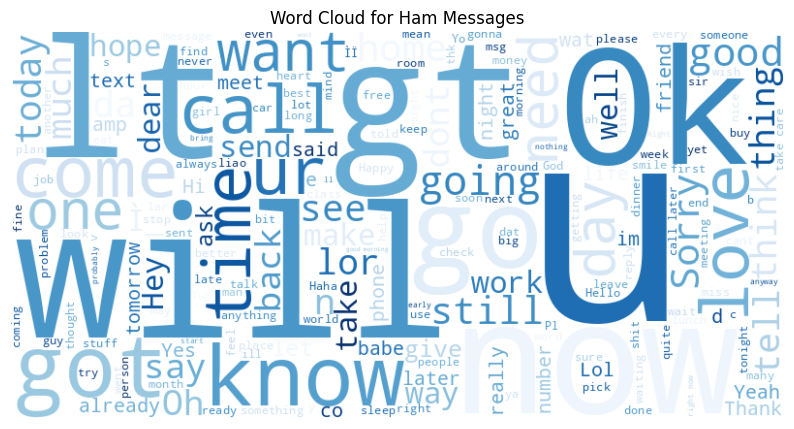

In [24]:
# Word Cloud for Ham
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

# Text Preprocessing..

In [25]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [26]:
# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)

    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(words)

In [27]:
data['message'] = data['message'].apply(preprocess_text)

In [28]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

X = tfidf.fit_transform(data['message'])

# Convert labels to binary values: spam = 1, ham = 0
y = data['label'].map({'spam': 1, 'ham': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Use Different Models :-

1) Logistic Regression classifier :-

In [29]:
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

Test Accuracy: 0.9713
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       965
        spam       0.91      0.87      0.89       150

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



2) Support vector model :-

In [30]:
svm_model = SVC(kernel='linear', probability=True,class_weight='balanced')  # Linear kernel is often a good choice for text data
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Test Accuracy: {accuracy_svm:.4f}')
print(classification_report(y_test, y_pred_svm, target_names=['ham', 'spam']))


SVM Test Accuracy: 0.9749
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.95      0.86      0.90       150

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



3)Random Forest Classifier :-

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Test Accuracy: {accuracy_rf:.4f}')
print(classification_report(y_test, y_pred_rf, target_names=['ham', 'spam']))


Random Forest Test Accuracy: 0.9758
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [32]:
###---------------------
### Validate the model...
###---------------------

sample_sms = ["Congratulations! You've won a free vacation. Click here to claim your prize."]
sample_tfidf = tfidf.transform(sample_sms)
predicted_label = rf_model.predict(sample_tfidf)

label = 'spam' if predicted_label[0] == 1 else 'ham'

print(f'The message is classified as: {label}')

The message is classified as: spam


# Save the Model

In [33]:
import pickle

# Assuming 'model' is your trained model (e.g., LogisticRegression, RandomForest, etc.)
with open('SMS_Spam_Detection_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
